# Name: Ahmad Ossama Ahmad 

## Task 6: Prediction using Decision Tree Algorithm 
## Goal:
### - Create Decision Tree Classifier and visualize it graphically
### - Add new data to the classifier and predict the right class accordingly

### Importing required libraries in Python

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Remove all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading Iris dataset

In [3]:
iris = datasets.load_iris()

# Classifying dataset into dataframe and labels
df = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Dataframe Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Splitting the dataset into training and testing ( 80% - 20% )

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 100)

### Create Decision Tree Classifier

In [7]:
# Define decision tree algorithm using entropy criterion
entropy_dTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
entropy_dTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Visualizing the Decision Tree for better clarification.

In [8]:
# Install required libraries
!pip install pydotplus
#!apt-get install graphviz -y

### Import necessary libraries for graph viz (visualaization)


In [9]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Visualize the tree

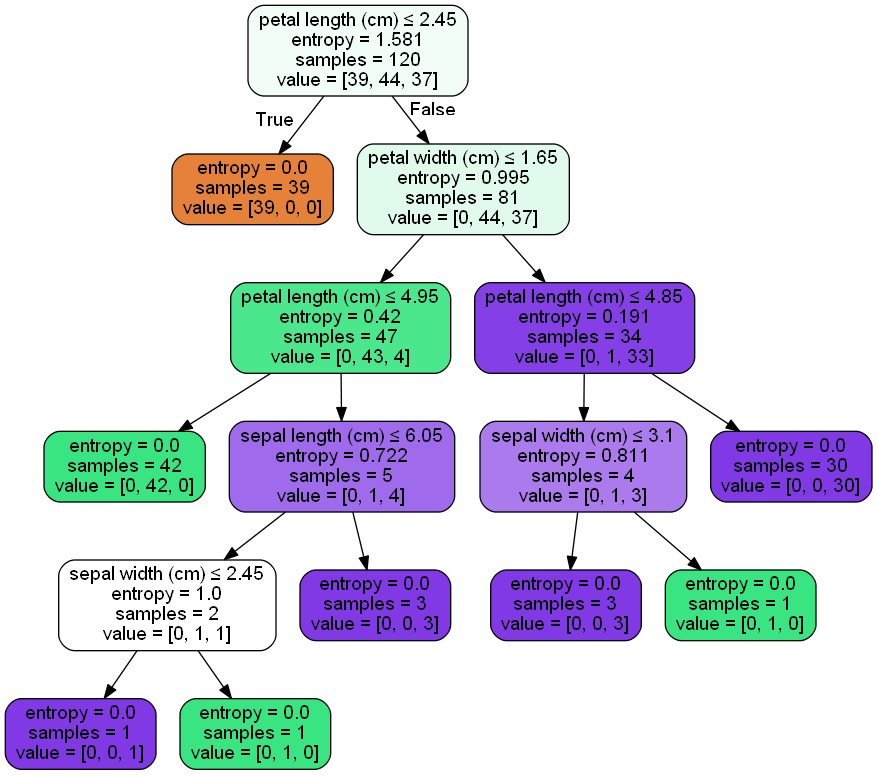

In [10]:
dot_data = StringIO()
export_graphviz(entropy_dTree, out_file = dot_data, feature_names = iris.feature_names,  
                filled=True, rounded=True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("Iris-dataset.png")
Image(graph.create_png())

### Make predictions on the test values

In [11]:
y_pred = entropy_dTree.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2]


### Calculating accuracy of the classifier and printing the classification report

In [12]:
print ("Accuracy: ", accuracy_score(y_test,y_pred) * 100)
print("---------------------------------------------------------")
print("Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  96.66666666666667
---------------------------------------------------------
Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

